`교안tf2-05Tensorflow와_Keras1.pdf`

# 3. Keras, 인공신경망과 심층신경망

케라스는 거의 모든 딥러닝 모델을 간편하게 만들 수 있는 프레임워크
 - 동일한 코드로 CPU와 GPU 에서 실행 가능와 쉬운 API 
 - CNN, RNN 등 지원
 - 다중 입력, 다중 출력 모델, 층의 공유, 모델 공유 등 다양한 망 구성 가능
 - Generative Adversarial Network(GAN) 부터 뉴럴 튜링 머신까지 어떤 딥러닝 모델도 가능하다.
 - MIT 라이센스!
 
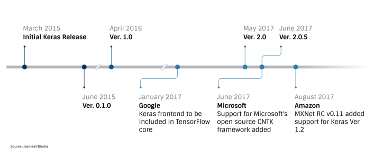

# 인공 신경망

#### 인공 신경망

- 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘.
- 기존의 머신러닝 알고리즘으로 다루기 힘들었던 이미지, 음성, 텍스트 분야에서 뛰어난 성능을 발휘하면서 주목받고 있다.
- 종종 딥러닝이라 부르기도 한다.

![image.png](https://i.imgur.com/CMBoiUI.png)

- 출력층 : z1 ~ z10에 해당, 클래스를 예측하여 신경망의 최종값을 만드는 층
- 뉴런 : z의 값을 계산하는 단위, 현재는 유닛이라 부르는 사람이 더 많아지고 있다.
- 입력층 : x1~x784에 해당, 픽셀값 그 자체이며 계산을 수행하진 않는다.

### 텐서플로와 케라스

- 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리이다.
- 텐서플로에는 저수준 API와 고수준 API가 있는데, 케라스가 텐서플로의 고수준 API이다.
- 케라스는 2015년 3월 프랑소와 숄레가 만든 딥러닝 라이브러리로, GPU를 사용하여 인공 신경망을 훈련한다.
- 케라스 라이브러리는 직접 GPU연산을 수행하지는 않는다
- GPU연산을 수행하는 다른 라이브러리(텐서플로, 씨아노,CNTK 등)를 백엔드로 사용한다.

### 텐서플로우 사용

In [ ]:
import tensorflow as tf
from tensorflow import keras

# for tensorflow 1.10 and above
import tensorflow.keras as keras
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

## - 패션 MNIST

패션 MNIST 데이터셋은 10종류의 패션 아이템으로 구성되어 있다.

 - MNIST 데이터는 손으로 쓴 0 ~ 9 까지의 숫자로 이루어져 있다. 
 - 패션 MNIST는 MNIST와 크기, 개수가 동일하지만 숫자 대신 패션 아이템으로 이루져있다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


전달 받은 데이터의 크기를 확인해 보자.

In [ ]:
print(train_input.shape, train_target.shape)

훈련 데이터는 60000개의 이미지로 이루어져 있다. 각 이미지는 28x28 크기이다. 라벨(타깃)도 60000개의 원소가 있는 1차원 배열이다.


In [ ]:
print(test_input.shape, test_target.shape)

테스트 세트는 10000개의 이미지로 이루어져 있다. 훈련 데이터에서 몇 개의 샘플을 그림으로 출력해보자.

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

크기가 28 x 28이다 보니 꽤 작고 흐릿하다. 신발과 다양한 종류의 옷들이 보인다. 이 샘플들의 타깃값을 확인해보자.

In [ ]:
print([train_target[i] for i in range(10)])

패션 MNIST의 타깃은 0 ~ 9까지의 숫자 레이블로 구성된다.

0 : 티셔츠
1 : 바지
2 : 스웨터
3 : 드레스
4 : 코트
5 : 샌달
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠

레이블 당 샘플 개수를 확인해 보자.

In [ ]:
print(np.unique(train_target, return_counts=True))

## - 로지스틱 회귀로 패션 아이템 분류하기

패션 MNIST의 경우 각 픽셀은 0 ~ 255 사이의 정숫값을 보통 255로 나누어 0 ~ 1 사이의 값으로 정규화한다. reshape() 메서드를 사용해 2차원 배열인 각 샘플을 1차원 배열로 펼쳐보자.


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

reshape() 메서드의 두 번째 매개변수 28x28 이미지 크기에 맞게 지정하면 첫 번째 차원은 변하지 않고 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐진다. 변환된 train_scaled의 크기를 확인해 보자.

In [ ]:
print(train_scaled.shape)

이 훈련 샘플은 60000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적이다. 이런 상황에 잘 맞는 방법이 확률적 경사 하강법이다. SGDClassifier는 2차원 입력을 다루지 못하기 때문에 각 샘플을 1차원 배열로 만들어야 한다.
 - SGDClassifier를 사용할 때 표준화 전처리된 데이터를 사용했다. 
 - 그 이유는 확률적 경사 하강법은 여러 특성중 기울기가 가장 가파른 방향을 따라 이동한다. 
 - 만약 특성마다 값의 범위가 다르면 올바르게 손실 함수의 경사를 내려올 수 없다. 

그리고 SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차 검증으로 성능을 확인해 보자.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

반복 횟수를 늘려도 크게 향상 되지는 않는다.

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

## - 인공신경망

가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다. 그럼 확률적 경사 하강법을 사용한 로지스틱 회귀 모델이 가장 간단한 인공 신경망이라면 인공 신경망을 만들어도 성능이 좋아지지 않을 것 같다. 

## - 인공신경망으로 모델 만들기

로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

In [ ]:
print(val_scaled.shape, val_target.shape)

#### Layer

케라스의 레이어 패키지 안에는 다양한 층이 준비되어 있다. 가장 기본이 되는 층은 밀집층이다. 
 - 픽셀이 784 이고 출력이 10개의 모두 연결된 선을 생각해보면 784 x 10 = 7840 개
 - 밀집층은 양쪽의 뉴런이 모두 빽빽하게 연결된 층으로, 완전 연결층이라고도 부른다.
 - 케라스의 Dense 클래스를 사용해 밀집층

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

이 밀집층을 가진 신경망 모델을 만들어보자.

In [ ]:
model = keras.Sequential(dense)

- Dense 클래스에는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기를 매개변수로 지정한다.
- 위에서는 뉴런의 출력에 적용하는 함수를 소프트맥스로 지정했는데, 이런 함수를 활성화 함수라고 부른다.
- 활성화 함수는 뉴런의 출력에 바로 적용되기 떄문에 또 다른 층의 일부라고 표현하기도 한다.

## - 인공신경망으로 패션 아이템 분류하기

케라스 모델 설정을 model 객체의 compile() 메서드에서 수행한다. 꼭 지정해야 할 것은 손실 함수의 종류이다. 

In [ ]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

이진 분류에선 출력층의 뉴런이 하나이다. 이 뉴런이 출력하는 확률값 a(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 크로스 엔트로피를 계산한다. 이진 분류의 출력 뉴런은 오직 양성 클래스에 대한 확률(a)만 출력하기 때문에 음성 클래스에 대한 확률은 1-a로 구할 수 있다. 역시 이진 분류의 타깃값은 양성 샘플을 경우에는 1, 음성 샘플일 경우에는 0이다. 0을 곱하면 어떤 계산이든지 모두 0이 되기 때문에 특별히 음성 샘플일 경우 1로 바꾸어(1-타깃값) 계산한다.


패션 MNIST 데이터셋과 같이 다중 분류일 경우, 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력한다. 첫 번째 뉴런은 티셔츠일 확률이고 두 번째 뉴런은 바지일 확률을 출력하자. 각 클래스에 대한 확률이 모두 출력되기 때문에 타깃에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱한다.

타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 원-핫 인코딩 이라고 부른다. 따라서 다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0,1,2 와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야 한다.

In [ ]:
print(train_target[:10])

텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있다. 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 바로 `'sparse_categorical_crossentropy'`이다. 

> 타깃값을 원-핫 인코딩으로 준비했다면 compile() 메서드에 손실 함수를 loss='categorical_crossentropy'로 지정한다.


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

그럼 앞서 따로 떼어놓은 검증 세트에서 모델의 성능을 확인해 보자. 케라스에서 모델의 성능을 평가하는 메서드는 evaluate() 메서드이다.

In [ ]:
model.evaluate(val_scaled, val_target)

evaluate() 메서드도 fit() 메서드와 비슷한 출력을 보여 준다. 검증 세트의 점수는 훈련 세트 점수보다 조금 낮은 것이 일반적이다.

# Keras 콜백

모든 콜백은 `keras.callbacks.Callback` 클래스를 하위 클래스화하며, 훈련, 테스트 및 예측의 다양한 단계에서 호출되는 메서드 세트를 재정의합니다. 콜백은 훈련 중 모델의 내부 상태 및 통계를 볼 때 유용합니다.

콜백(키워드 인수 callbacks와 같은)의 목록을 다음 모델 메서드에 전달할 수 있습니다.

- keras.Model.fit()
- keras.Model.evaluate()
- keras.Model.predict()


In [ ]:
def random_onehot_labels(shape):
    """전달받는 shape 차원에 맞는 임의 one-hot encoding 결과를 반환
    """
    n, n_class = shape
    classes = np.random.randint(0, n_class, n)
    tmp_labels = np.zeros((n, n_class))
    tmp_labels[np.arange(n), classes] = 1
    return tmp_labels

In [ ]:
data = np.random.random((10000, 32))
labels = random_onehot_labels((10000, 10))

In [ ]:
data.shape, labels.shape

In [ ]:
data[:1]

In [ ]:
labels[:1]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
from tqdm.keras import TqdmCallback

durations = []

for i in range(5): #run N times
    # start = timer()
    model.fit(data, labels, epochs=500, batch_size=32,
              verbose=0,
             callbacks=[TqdmCallback()])
    # durations.append(timer() - start)



GPU : Zotac 1080 ti : ***5 회 ***

```
	NVIDIA GeForce GTX 1080 Ti

	드라이버 버전:	30.0.15.1006
	드라이버 날짜:	2021-08-24
	DirectX 버전:	12 (FL 12.1)
	실제 위치:	PCI 버스 9, 장치 0, 기능 0

	사용률	8% / 51도
	전용 GPU 메모리	10.8/11.0GB
	공유 GPU 메모리	0.5/32.0GB
	GPU 메모리	11.2/43.0GB
```


In [ ]:
#
print(f'tf.version = {tf.version.VERSION}')
print(f'tf.keras version = {tf.keras.__version__}')
devices = device_lib.list_local_devices() # this may allocate all GPU memory
print(f'devices = ({x.name for x in devices})')
print(f'model.fit durations: {durations}')